<a href="https://colab.research.google.com/github/lgiesen/forest_height/blob/main/notebooks/compare_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount ('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# the zipped data is uploaded in the root_path folder
root_path = 'drive/MyDrive/Colab Notebooks/data/'
path_images = f'{root_path}images/'
path_masks = f'{root_path}masks/'
user = "lgiesen"
repo = "forest_height"
color="#01748F"
!git clone https://github.com/{user}/{repo}.git

Cloning into 'forest_height'...
remote: Enumerating objects: 501, done.
remote: Counting objects: 100% (153/153), done.
remote: Compressing objects: 100% (135/135), done.
remote: Total 501 (delta 78), reused 61 (delta 18), pack-reused 348
Receiving objects: 100% (501/501), 23.59 MiB | 18.18 MiB/s, done.
Resolving deltas: 100% (269/269), done.


In [3]:
%run /content/forest_height/src/load_data.py
%run /content/forest_height/src/evaluate_model.py

Load data and models

In [13]:
X_train, y_train, X_test, y_test = load_data("ndvi")
# reshape to fit models
X_train, X_test = X_train.reshape(-1,1), X_test.reshape(-1,1)

In [5]:
import joblib
models_path = "forest_height/models/"
gbr = joblib.load(f"{models_path}boosted_trees_NDVI_10.01.joblib")
dt = joblib.load(f"{models_path}decison_trees_NDVI_10.02.joblib")
rf = joblib.load(f"{models_path}random_forest_NDVI_10.02.joblib")

In [25]:
rf = joblib.load(f"{models_path}archive/random_forest.joblib")

Get predictions from every model:

Boosted Trees

In [15]:
y_pred_gbr = gbr.predict(X_test)
mae_gbr, mse_gbr, rmse_gbr, mape_gbr = evaluate_model(y_test, y_pred_gbr)

MAE: 10.010264086025932; MSE: 136.04751729766355; RMSE: 3.1639001384408347; MAPE: 1.2606865889059502


Decision Trees

In [17]:
y_pred_dt = dt.predict(X_test)
mae_dt, mse_dt, rmse_dt, mape_dt = evaluate_model(y_test, y_pred_dt)

MAE: 10.024194370966914; MSE: 136.3848106951077; RMSE: 3.1661008150352563; MAPE: 1.2621682918256745


Random Forest

In [16]:
y_pred_rf = rf.predict(X_test)
mae_rf, mse_rf, rmse_rf, mape_rf = evaluate_model(y_test, y_pred_rf)

MAE: 10.021537493308648; MSE: 136.5169536595948; RMSE: 3.165681205255616; MAPE: 1.2434139977359764


### Compare Errors

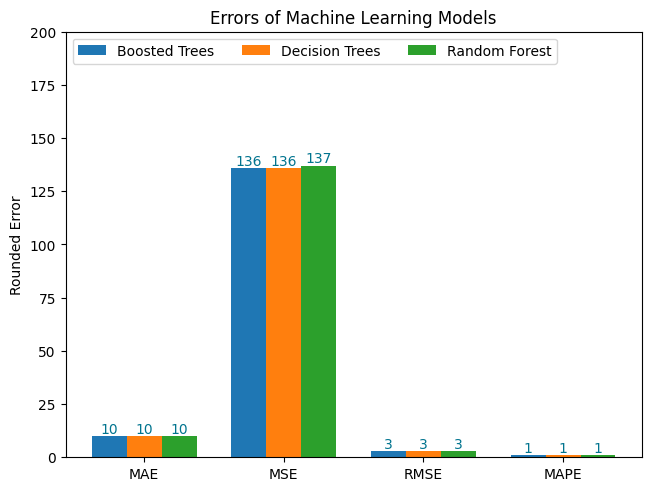

In [80]:
import numpy as np
errors = ("MAE", "MSE", "RMSE", "MAPE")
models = {
    'Boosted Trees': (mae_gbr, mse_gbr, rmse_gbr, mape_gbr),
    'Decision Trees': (mae_dt, mse_dt, rmse_dt, mape_dt),
    'Random Forest': (mae_rf, mse_rf, rmse_rf, mape_rf),
}

x = np.arange(len(errors))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in models.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, np.round(measurement), width, label=attribute)
    ax.bar_label(rects, padding=0, color=color)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Rounded Error')
ax.set_title('Errors of Machine Learning Models')
ax.set_xticks(x + width, errors)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 200)

plt.show()

In [112]:
sex_counts = {
    'Male': np.array([73, 34, 61]),
    'Female': np.array([73, 34, 58]),
}
for sex, sex_count in sex_counts.items():
    print(type(sex))

<class 'str'>
<class 'str'>


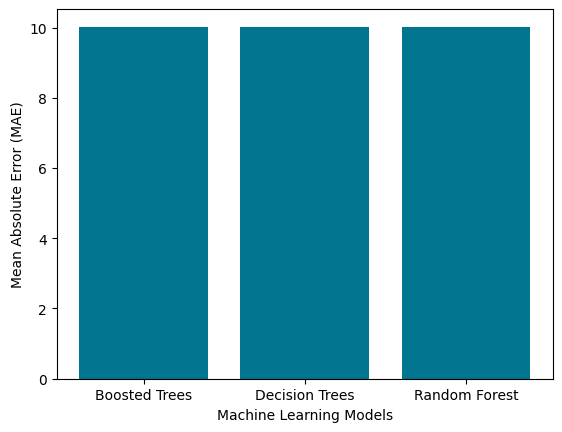

In [128]:
models = ['Boosted Trees', 'Decision Trees', 'Random Forest']
errors = [mae_gbr, mae_dt, mae_rf]
plt.bar(models, errors, color=color)
plt.ylabel("Mean Absolute Error (MAE)")
plt.xlabel("Machine Learning Models")
ax.set_title('MAE of Machine Learning Models')
plt.show()

### Compare Feature Importance

Load models with all possible features, i.e. all color channels and NDVI values.

In [29]:
rf_color_channels_ndvi = joblib.load(f"{models_path}random_forest_color_channels_NDVI_10.45.joblib")
dt_color_channels_ndvi = joblib.load(f"{models_path}decison_trees_color_channels_NDVI_10.08.joblib")
gbr_color_channels_ndvi = joblib.load(f"{models_path}boosted_trees_color_channels_NDVI_10.09.joblib")

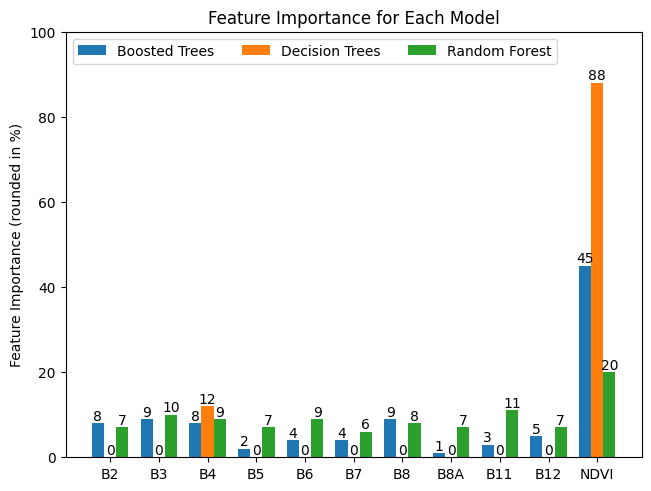

In [96]:
import numpy as np
channel = ['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B11', 'B12', 'NDVI']
models = {
    'Boosted Trees': gbr_color_channels_ndvi.feature_importances_ * 100,
    'Decision Trees': dt_color_channels_ndvi.feature_importances_ * 100,
    'Random Forest': rf_color_channels_ndvi.feature_importances_ * 100,
}

x = np.arange(len(channel))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in models.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, np.round(measurement), width, label=attribute)
    ax.bar_label(rects, padding=0)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Feature Importance (rounded in %)')
ax.set_title('Feature Importance for Each Model')
ax.set_xticks(x + width, channel)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 100)

plt.show()

Visualize model predictions vs. true values

In [ ]:
from matplotlib import pyplot as plt
# only the NDVI channel is plotted on the x-axis
# because 11-dimensional data cannot be visualized for humans

def visualize
fig, ax = plt.subplots()
plt.scatter(X_test, y_test, 10, color='black')
plt.scatter(X_test, y_pred, 10, color=color)
plt.title('Random Forest Regression')
plt.xlabel('NDVI Value')
plt.ylabel('Forest Height')
ax.legend(("True Value", "Prediction"), loc='upper left')
plt.show()

Predictions vs True Values

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

def visualize_pred_vs_true(y_pred, y_test, model_name):
    fig = plt.figure(figsize=(8,8))
    plt.scatter(y_pred, y_test, color=color, alpha=0.5)
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
    plt.plot([-1,75], [-1, 75], 'k--')
    plt.xlabel("Predictions")
    plt.ylabel("True Labels")
    plt.xlim([-1,75])
    plt.ylim([-1,75])
    plt.title(f"Evaluation of {model_name} Model on Labeled Data")
    plt.show()

Visualize prediction

In [ ]:
%run forest_height/src/visualize_data.py

In [ ]:
plot(y_pred[0])
plot(X_test[0])